# 1. Import Necessary Libraries

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [158]:
df_train = pd.read_csv('Final_Train.csv',encoding= 'unicode_escape')
df_test = pd.read_csv('Final_Train.csv',encoding= 'unicode_escape')

In [159]:
df_train.shape

(5961, 7)

In [160]:
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [161]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [162]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [163]:
len(df_train['Rating'].unique())

52

In [164]:
len(df_train['Miscellaneous_Info'].unique())

2999

### Imputing Missing Values with Medians

In [165]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [166]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [167]:
df_train['Rating'].value_counts()

100%    684
98%     290
99%     259
97%     241
96%     220
95%     178
94%     115
93%     109
90%      66
92%      66
91%      60
89%      42
88%      41
85%      27
82%      23
86%      21
83%      21
80%      19
77%      16
87%      14
84%      13
79%      13
67%      12
81%      12
76%       9
71%       9
73%       8
75%       8
60%       7
74%       7
78%       6
56%       5
68%       5
70%       4
69%       4
57%       3
72%       3
64%       2
55%       2
63%       2
33%       2
62%       2
7%        1
45%       1
53%       1
36%       1
48%       1
65%       1
47%       1
58%       1
40%       1
Name: Rating, dtype: int64

In [125]:
df_train['Place'].value_counts()

HSR Layout, Bangalore              75
Andheri West, Mumbai               70
Dwarka, Delhi                      67
Banjara Hills, Hyderabad           64
Mulund West, Mumbai                54
                                   ..
Nanjundapuram, Coimbatore           1
Kallambalam, Thiruvananthapuram     1
TV Chalai, Thiruvananthapuram       1
Cherannagar, Coimbatore             1
Badarpur, Delhi                     1
Name: Place, Length: 877, dtype: int64

In [124]:
df_train['Miscellaneous_Info'].value_counts()

100% 16 Feedback Kakkanad, Ernakulam                                                        2621
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                            40
Dental Fillings Zirconia Crowns Dental Implant Fixing                                         12
Tooth Extraction Dental Fillings Scaling / Polishing                                          12
Skin Allergy Treatment Skin Allergies Dermabrasion                                             9
                                                                                            ... 
Cast Partial Denture Impaction / Impacted Tooth Extraction Cosmetic/ Aesthetic Dentistry       1
97% 13 Feedback Laxmi Nagar, Delhi                                                             1
Oral & Maxillofacial Surgery Oral Surgery Procedures Jaw Reshaping                             1
Kailash Colony, Delhi ?200 Available Today                                                     1
91% 3 Feedback Purasawakkam, C

In [168]:
df_train['Rating']=df_train.Rating.transform(lambda x: x.fillna('100%'))
df_train['Place']=df_train.Place.transform(lambda x: x.fillna('HSR Layout, Bangalore '))
df_train['Miscellaneous_Info']=df_train.Miscellaneous_Info.transform(lambda x: x.fillna('100% 16 Feedback Kakkanad, Ernakulam'))

In [137]:
df_train.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [13]:
df_train['Place'].value_counts()

HSR Layout, Bangalore              100
Andheri West, Mumbai                70
Dwarka, Delhi                       67
Banjara Hills, Hyderabad            64
Mulund West, Mumbai                 54
                                  ... 
Nanjundapuram, Coimbatore            1
Kallambalam, Thiruvananthapuram      1
TV Chalai, Thiruvananthapuram        1
Cherannagar, Coimbatore              1
Badarpur, Delhi                      1
Name: Place, Length: 877, dtype: int64

In [21]:
df_train['Qualification'].value_counts()

BDS                                                                        240
MBBS, MD - Dermatology                                                     117
BHMS                                                                       110
MBBS, MS - ENT                                                              97
BAMS                                                                        76
                                                                          ... 
BDS, Diploma in Implanthology, Advanced Endotontic Course On Root Canal      1
MBBS, Fellowship in Diabetology(Royal Liverpool Academy, UK)                 1
BAMS, Certificate Course In Therapeutic Yoga                                 1
BAMS, MD - Ayurveda Medicine, Post Graduate Diploma In Yoga                  1
MBBS, DDVL, MD - Dermatology , Venereology & Leprosy                         1
Name: Qualification, Length: 846, dtype: int64

In [22]:
df_train['Profile'].value_counts()

Dentist             862
Dermatologists      628
General Medicine    371
ENT Specialist      295
Homeopath           246
Ayurveda            175
Name: Profile, dtype: int64

# 3. Exploratory Data Analysis Data Visualization

[Text(0, 0, '24 years experience'),
 Text(0, 0, '12 years experience'),
 Text(0, 0, '20 years experience'),
 Text(0, 0, '10 years experience'),
 Text(0, 0, '9 years experience'),
 Text(0, 0, '19 years experience'),
 Text(0, 0, '21 years experience'),
 Text(0, 0, '25 years experience'),
 Text(0, 0, '15 years experience'),
 Text(0, 0, '7 years experience'),
 Text(0, 0, '14 years experience'),
 Text(0, 0, '23 years experience'),
 Text(0, 0, '31 years experience'),
 Text(0, 0, '8 years experience'),
 Text(0, 0, '22 years experience'),
 Text(0, 0, '16 years experience'),
 Text(0, 0, '11 years experience'),
 Text(0, 0, '38 years experience'),
 Text(0, 0, '6 years experience'),
 Text(0, 0, '36 years experience'),
 Text(0, 0, '13 years experience'),
 Text(0, 0, '41 years experience'),
 Text(0, 0, '40 years experience'),
 Text(0, 0, '30 years experience'),
 Text(0, 0, '26 years experience'),
 Text(0, 0, '5 years experience'),
 Text(0, 0, '34 years experience'),
 Text(0, 0, '39 years experience'

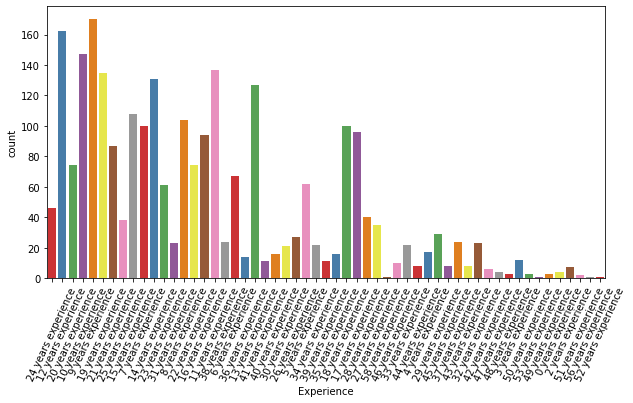

In [17]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='Experience',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

[Text(0, 0, '100%'),
 Text(0, 0, '98%'),
 Text(0, 0, '99%'),
 Text(0, 0, '79%'),
 Text(0, 0, '95%'),
 Text(0, 0, '97%'),
 Text(0, 0, '94%'),
 Text(0, 0, '88%'),
 Text(0, 0, '90%'),
 Text(0, 0, '80%'),
 Text(0, 0, '93%'),
 Text(0, 0, '36%'),
 Text(0, 0, '78%'),
 Text(0, 0, '87%'),
 Text(0, 0, '96%'),
 Text(0, 0, '82%'),
 Text(0, 0, '89%'),
 Text(0, 0, '74%'),
 Text(0, 0, '86%'),
 Text(0, 0, '92%'),
 Text(0, 0, '83%'),
 Text(0, 0, '76%'),
 Text(0, 0, '85%'),
 Text(0, 0, '56%'),
 Text(0, 0, '91%'),
 Text(0, 0, '68%'),
 Text(0, 0, '60%'),
 Text(0, 0, '75%'),
 Text(0, 0, '69%'),
 Text(0, 0, '73%'),
 Text(0, 0, '67%'),
 Text(0, 0, '77%'),
 Text(0, 0, '33%'),
 Text(0, 0, '55%'),
 Text(0, 0, '71%'),
 Text(0, 0, '84%'),
 Text(0, 0, '45%'),
 Text(0, 0, '63%'),
 Text(0, 0, '72%'),
 Text(0, 0, '81%'),
 Text(0, 0, '62%'),
 Text(0, 0, '57%'),
 Text(0, 0, '7%'),
 Text(0, 0, '48%'),
 Text(0, 0, '40%'),
 Text(0, 0, '64%'),
 Text(0, 0, '70%'),
 Text(0, 0, '65%'),
 Text(0, 0, '47%'),
 Text(0, 0, '58%'),


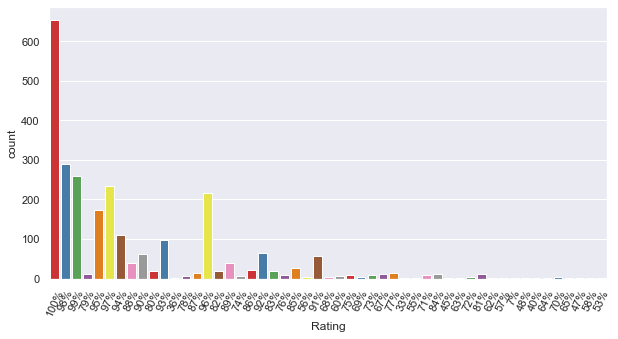

In [19]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='Rating',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=65)

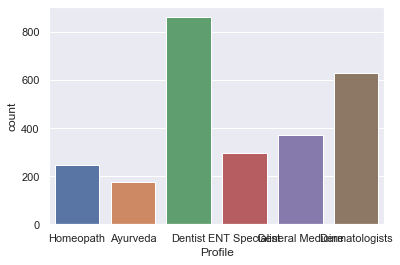

In [23]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Profile", data=df_train)

[Text(0, 0, 'No info'),
 Text(0, 0, 'In-flight meal not included'),
 Text(0, 0, 'No check-in baggage included'),
 Text(0, 0, '1 Short layover'),
 Text(0, 0, 'No Info'),
 Text(0, 0, '1 Long layover'),
 Text(0, 0, 'Change airports'),
 Text(0, 0, 'Business class'),
 Text(0, 0, 'Red-eye flight'),
 Text(0, 0, '2 Long layover')]

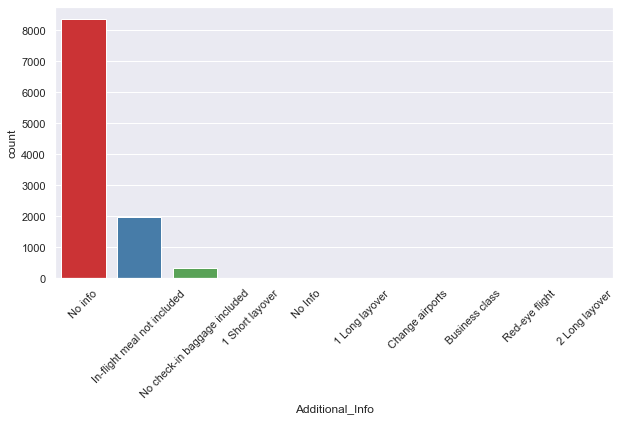

In [44]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='Additional_Info',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# 4. Data pre-processing and cleaning

## A. Cleaning data Manually

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

## B.Converting all features to numerical features 

In [169]:
df_train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [170]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['Qualification']= label_encoder.fit_transform(df_train['Qualification']) 
df_train['Experience']= label_encoder.fit_transform(df_train['Experience'])  
df_train['Rating']= label_encoder.fit_transform(df_train['Rating']) 
df_train['Place']= label_encoder.fit_transform(df_train['Place']) 
df_train['Profile']= label_encoder.fit_transform(df_train['Profile']) 
df_train['Miscellaneous_Info']= label_encoder.fit_transform(df_train['Miscellaneous_Info']) 


## C.Removing Unwanted columns

## D.Removing outliers using standard methods

In [171]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df_train))
print(np.where(z>3))
df_train=df_train[(z<3).all(axis=1)]

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int64))


### E .Train_test Split

In [172]:
y=df_train['Fees']
x=df_train.drop(['Fees'],axis=1)

In [173]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5941, dtype: int64

In [174]:
X_train, X_cv, y_train, y_cv = train_test_split(x, y, test_size=0.33, random_state=42)

In [175]:
X_test=df_test

In [176]:
round(X_train, 2)
round(X_cv, 2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
5816,40,44,50,413,0,1481
1627,309,8,50,227,1,2647
3442,285,62,0,542,1,1595
2124,134,8,0,340,1,2638
2696,943,31,0,436,4,130
...,...,...,...,...,...,...
1877,1075,38,24,170,3,447
5863,874,5,45,294,2,913
191,203,4,46,448,1,1583
2799,10,5,0,434,0,130


In [177]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_train = feature_scaler.fit_transform(X_train)
X_cv = feature_scaler.transform(X_cv)

In [26]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_cv = feature_scaler.transform(X_cv)

In [94]:
X_cv.shape

(1961, 6)

# 5. Building Models

# Model1 : KNN

In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [179]:
clf.best_params_

{'n_neighbors': 91}

In [180]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=91)
neigh.fit(X_train, y_train)

y_cv_pred = neigh.predict(X_cv)
print(r2_score(y_cv,y_cv_pred))


0.09175182220934963


# Model 3 : Linear regression 

In [187]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_cv_pred = Lr.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.08339080455150438


# Model 4 : SVM

In [189]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.07592400005611488


In [190]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [191]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in tqdm(C):
    #
    svm = SVR(C=k,gamma= 1,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

100%|██████████| 5/5 [00:35<00:00,  7.03s/it]


[-0.003720258142269417, -0.001723880629567176, 0.031713914331671055, 0.056151522386721164, 0.06638716717469863]


In [192]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

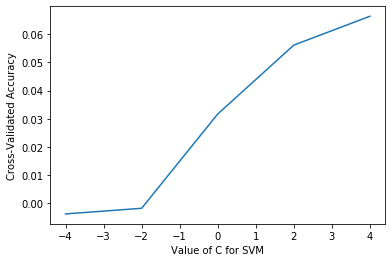

In [193]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [194]:
from sklearn.svm import SVR

clf = SVR(C=1000,gamma=1,kernel= 'rbf')

clf.fit(X_train, y_train)

y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.06778389634266757


# Model 5 : Decision Tree

In [195]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.17725380793680046


In [196]:
model.best_params_

{'max_depth': 5}

In [197]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.029237486121705937, 0.1073833204583297, 0.03867035921962845, 0.033705476936516876, 0.034015571631765815]


Text(0, 0.5, 'Cross-Validated Accuracy')

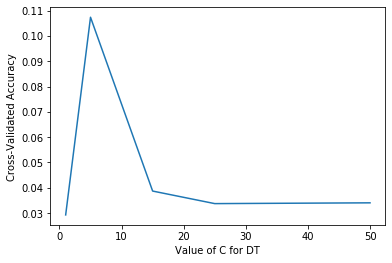

In [198]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [200]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(criterion='mse',max_depth=5,min_samples_split=2)

clf.fit(X_train, y_train)


y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.09024403856730179


# Model 6 : Ensemble Techniques 

## A. Bagging

In [201]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.4933107511207661


In [202]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=10,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_cv_pred = RF.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.13347427972064385


# Boosting

In [203]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=20,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
clf=GradientBoostingRegressor(max_depth=10,n_estimators=100)
clf.fit(X_train, y_train)

y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.047903099147461825


## Note: As we have very less data stascking is not advisable 

# Xgboost

In [205]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_cv_pred = xgb_model.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))



[16:30:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.14256096139430796


# 6.Model Comparison

In [206]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.0917' ])
table.add_row(["Linear Regression" ,'0.0833' ])
table.add_row(["SVM", '0.0677' ])
table.add_row(["Decision Tree",'0.0902' ])
table.add_row(["RandomForest",'0.1334' ])
table.add_row(["GBDT" ,'0.0497' ])
table.add_row(["Xgboost",'0.1425' ])

print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.0917  |
| Linear Regression |  0.0833  |
|        SVM        |  0.0677  |
|   Decision Tree   |  0.0902  |
|    RandomForest   |  0.1334  |
|        GBDT       |  0.0497  |
|      Xgboost      |  0.1425  |
+-------------------+----------+


Summary:<br>
1.Xgboost is the best model amongst all with r2score  of 0.8390<br>

# 7.Creating Submission File

In [207]:
best_model=xgb_model
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']